In [1]:
from laser_measles import Births
from laser_measles import Incubation
from laser_measles import Infection
from laser_measles import MaternalAntibodies
from laser_measles import Model
from laser_measles import NonDiseaseDeaths
from laser_measles import RoutineImmunization
from laser_measles import Susceptibility
from laser_measles import Transmission
from laser_measles.generic import get_parameters
from laser_measles.generic import get_scenario
from laser_measles.utils import seed_infections_in_patch


In [2]:
parameters = get_parameters({"nticks": 1825, "seed": 20241203, "verbose": True})
scenario = get_scenario(parameters, parameters["verbose"])
model = Model(scenario, parameters)

# infection dynamics come _before_ incubation dynamics so newly set itimers
# don't immediately expire
model.components = [
    Births,
    NonDiseaseDeaths,
    Susceptibility,
    MaternalAntibodies,
    RoutineImmunization,
    Infection,
    Incubation,
    Transmission,
]

Using `1825` for parameter `nticks` from the command line…
Using `20241203` for parameter `seed` from the command line…
Using `True` for parameter `verbose` from the command line…
2024-12-04 02:41:36.526575: Creating the measles model…
Initializing the measles model with 39 patches…
Counties: ['Grant' 'Garfield' 'Island' 'Kittitas']...
Populations: [74698  2397 71558 33362]...
Lat/longs: [(47.20822076628014, -119.45091501010397), (46.43238523022755, -117.5452509757527), (48.16411330866384, -122.57633597592626), (47.12533057005665, -120.68058848581116)]...
Upper left corner of distance matrix:
[[  0.      168.71619 256.942    93.41534]
 [168.71619   0.      425.34818 250.85437]
 [256.942   425.34818   0.      183.05191]
 [ 93.41534 250.85437 183.05191   0.     ]]
Population growth: 5,894,121 … 6,312,009
Alternate growth:  5,894,121 … 6,309,083
Assigning day of year of birth to agents…


100%|██████████| 21/21 [00:00<00:00, 85.92it/s]


Adding agents to the non-disease death queue…


100%|██████████| 35259/35259 [00:00<00:00, 199168.73it/s]


In [3]:
seed_infections_in_patch(model, ipatch=13, ninfections=100)

model.run()


2024-12-04 02:41:42.674082: Running the measles model for 1825 ticks…


  0%|          | 0/1825 [00:00<?, ?it/s]

100%|██████████| 1825/1825 [00:22<00:00, 79.97it/s]

Completed the measles model at 2024-12-04 02:42:05.498269…
Model              :        11,600 µs
Births             :     2,761,764 µs
NonDiseaseDeaths   :       813,369 µs
MaternalAntibodies :     1,622,855 µs
RoutineImmunization:     1,733,102 µs
Infection          :     1,783,368 µs
Incubation         :     2,690,663 µs
Transmission       :    10,998,360 µs
Total:                  22,415,081 microseconds


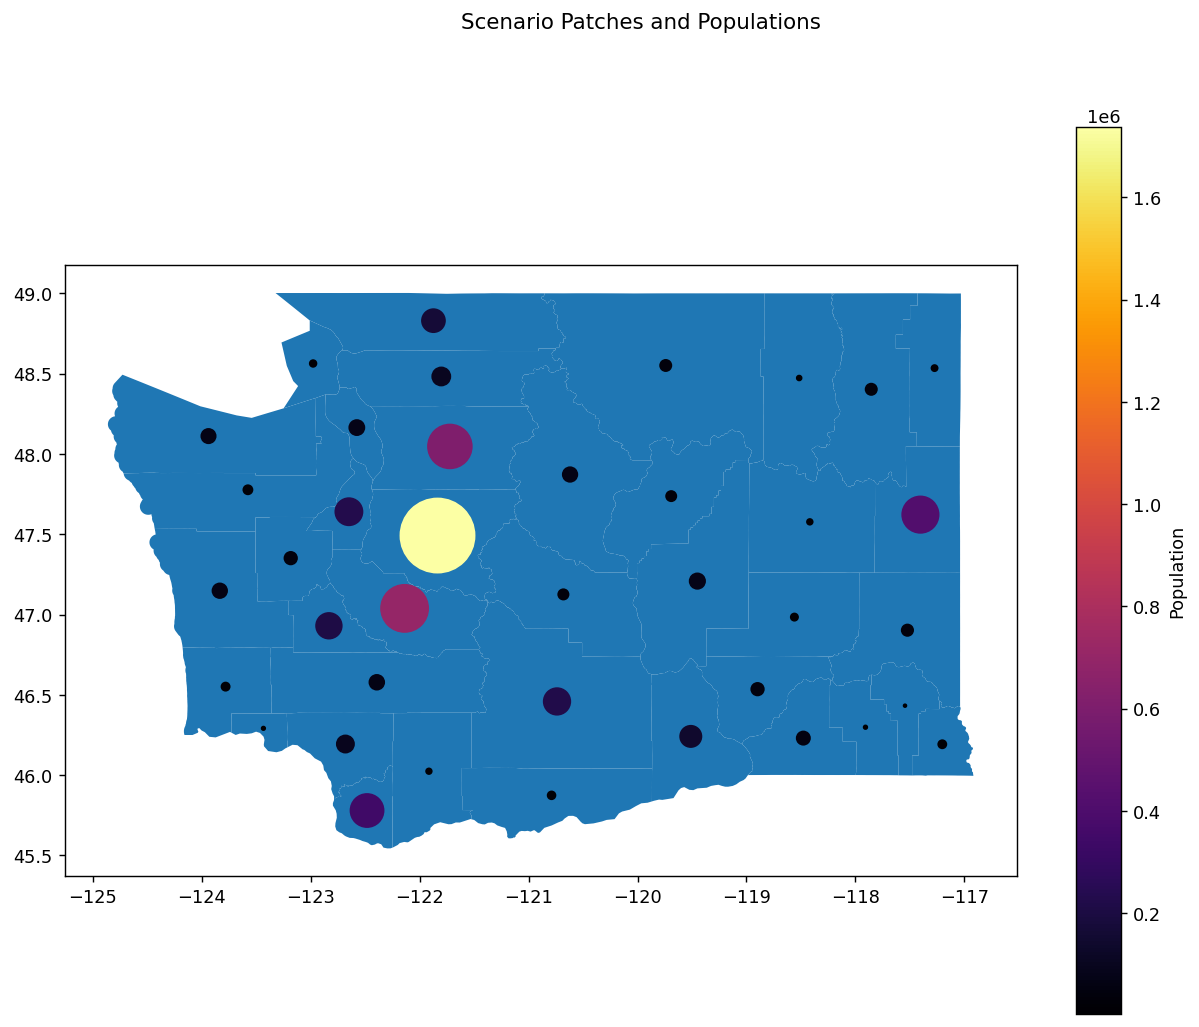

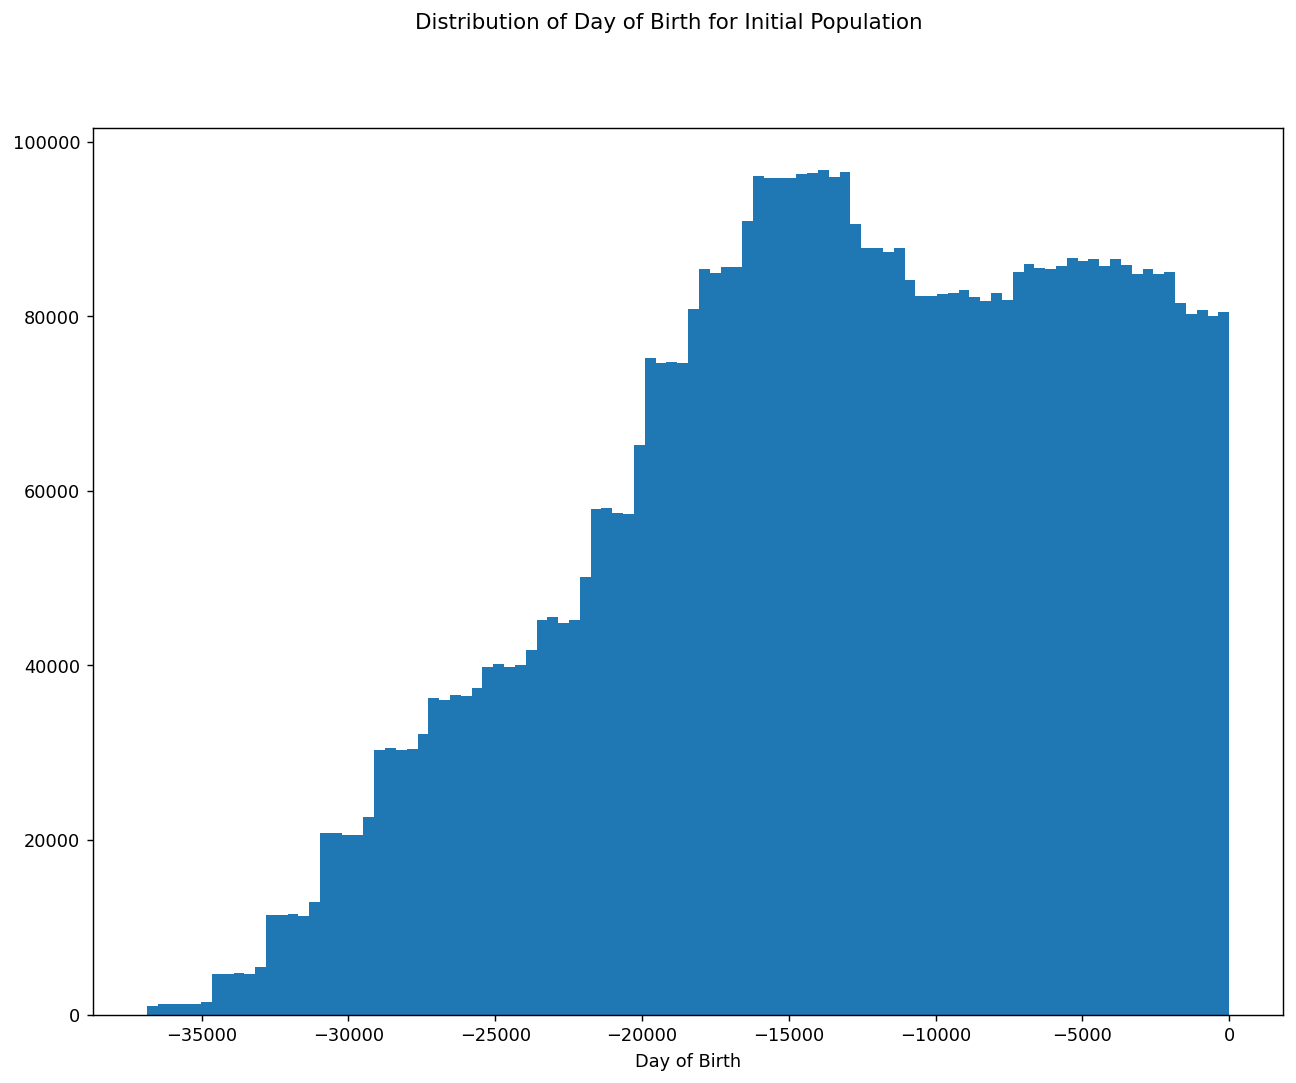

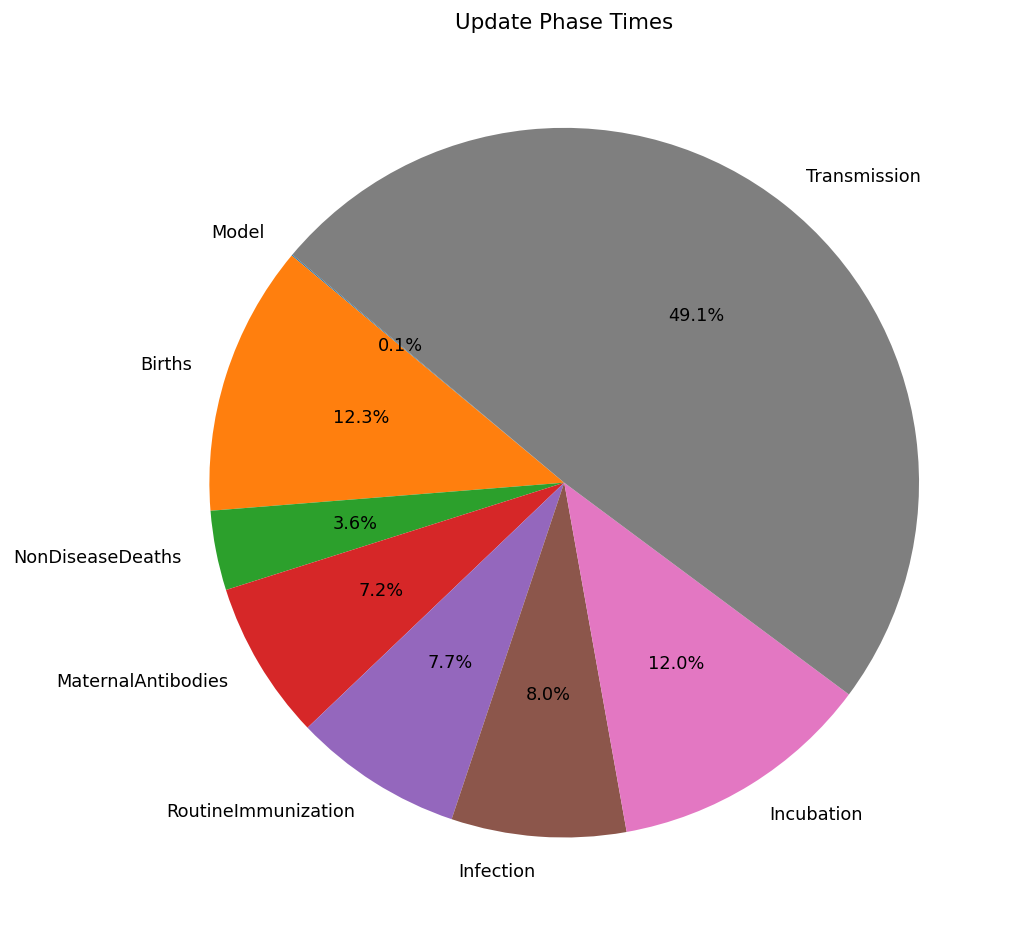

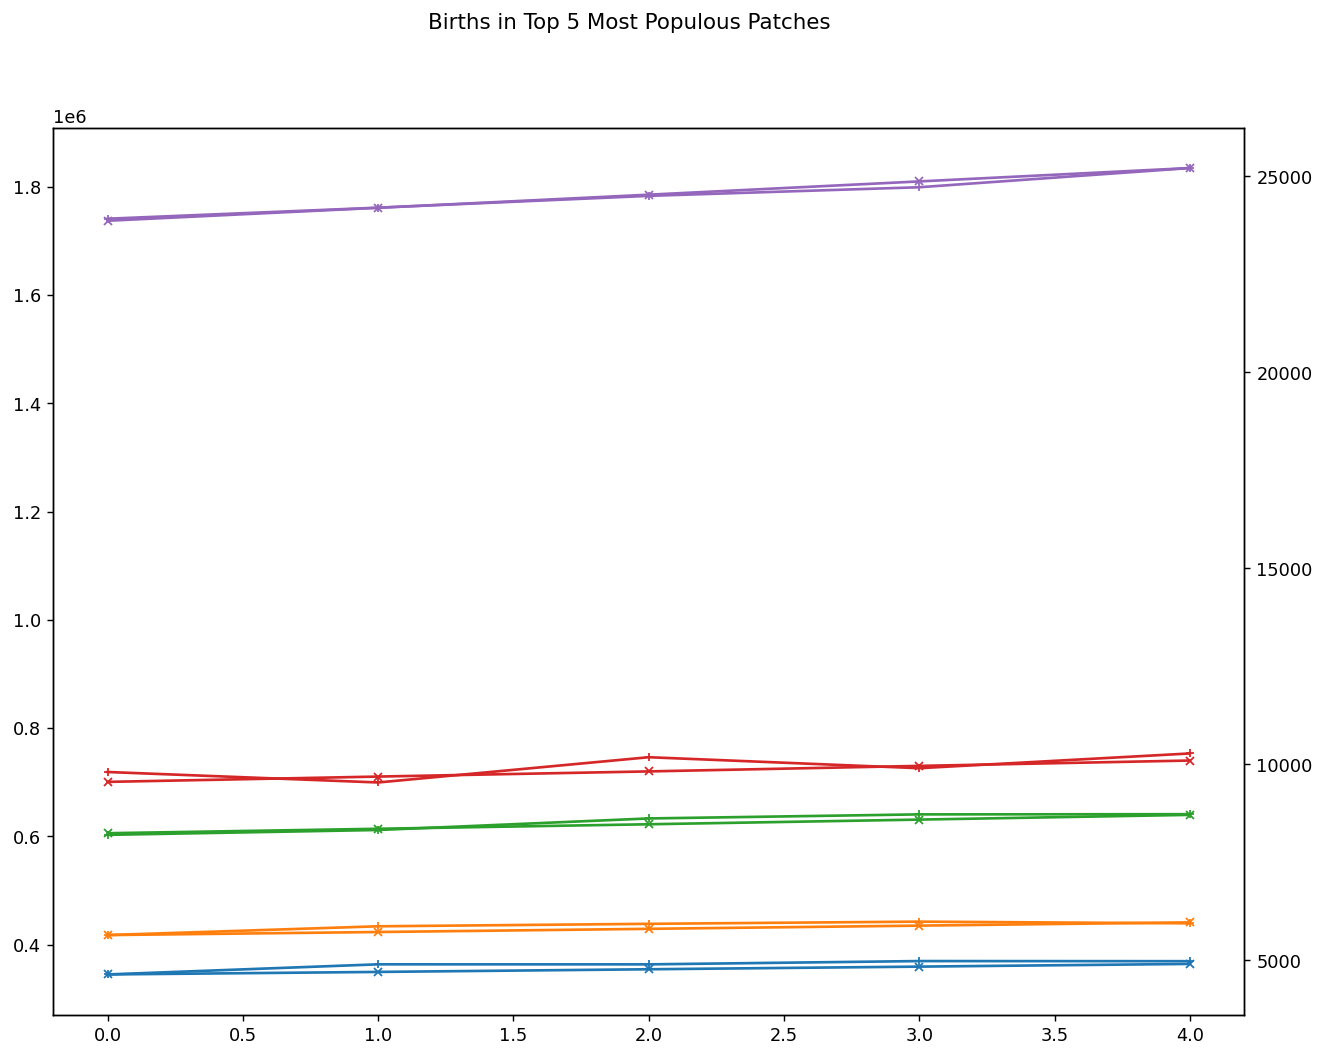

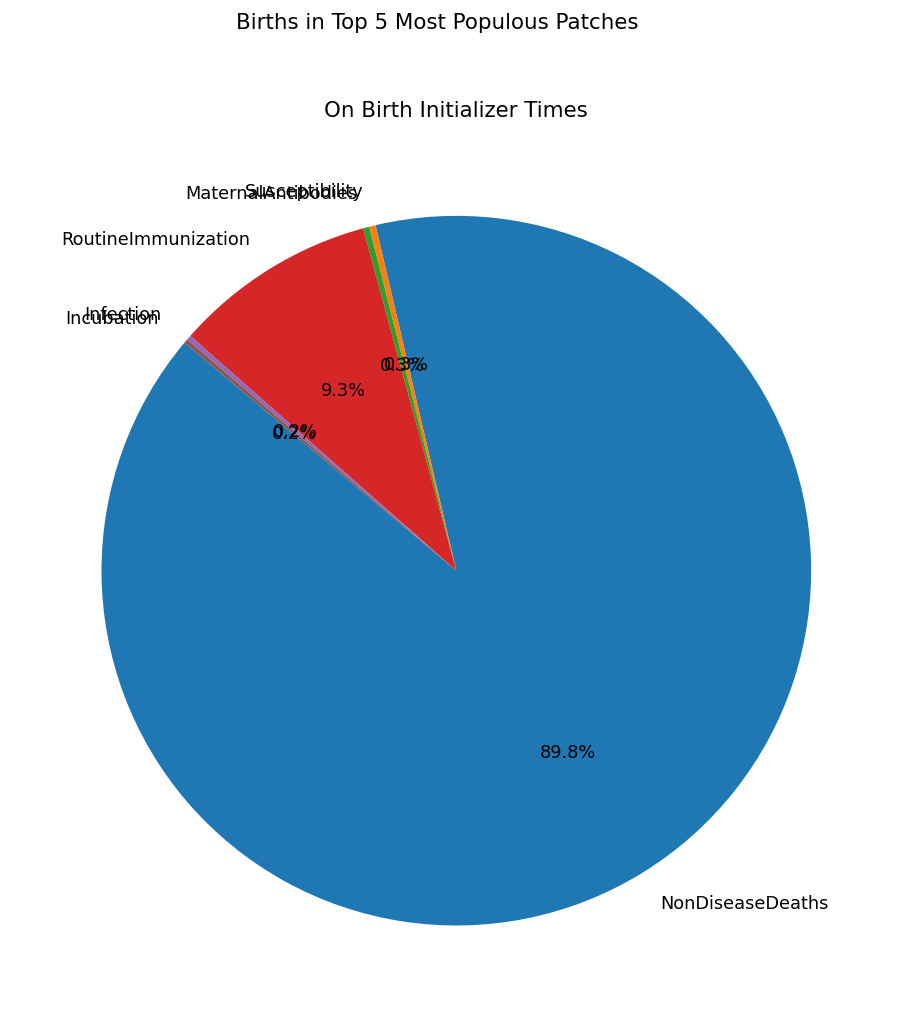

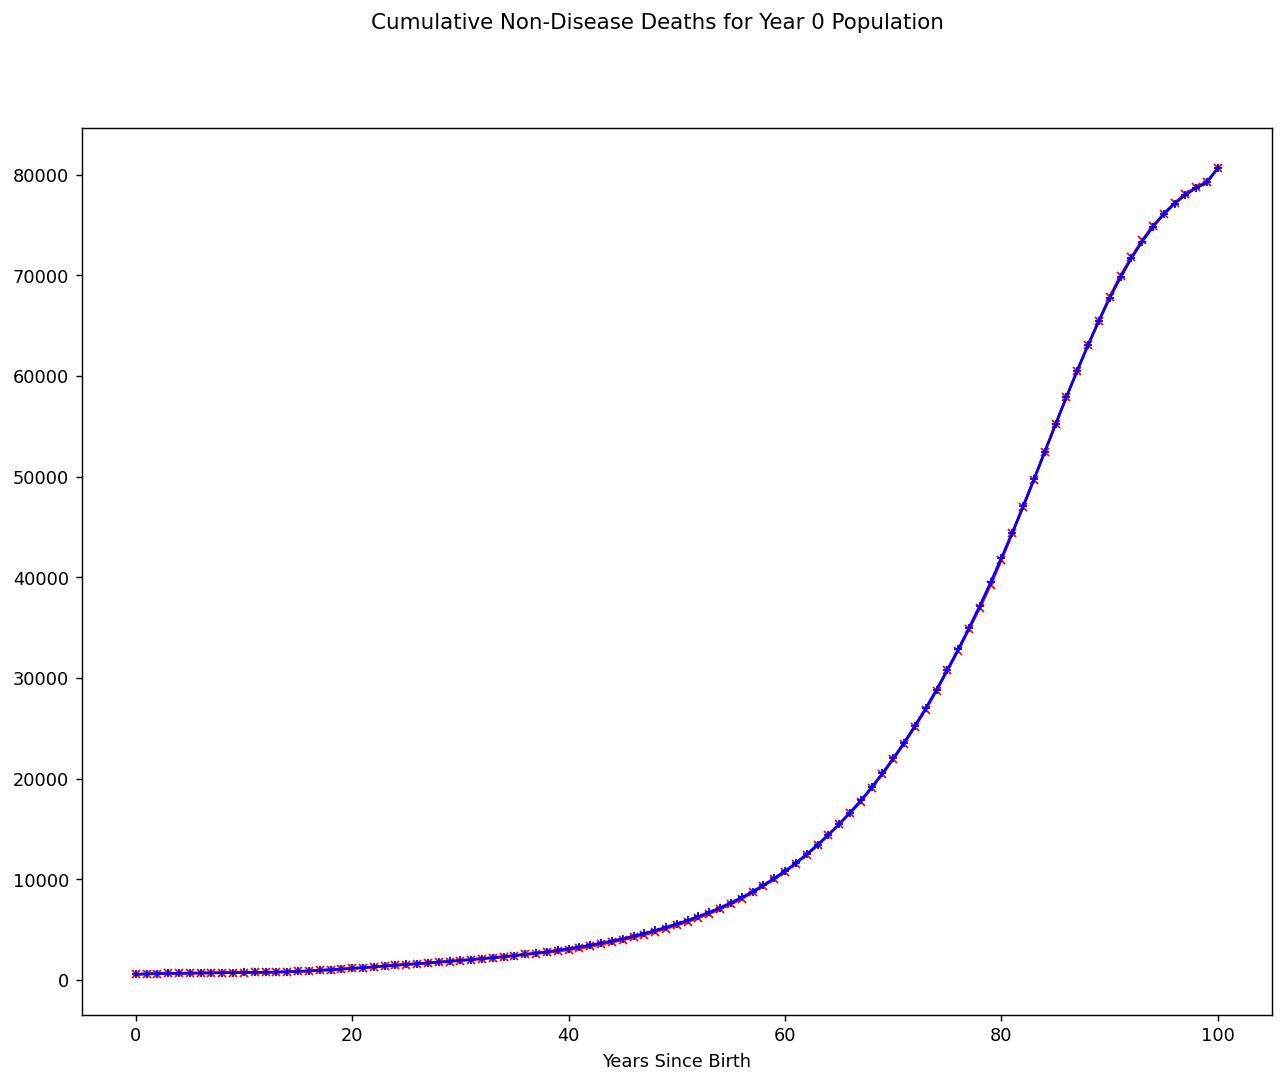

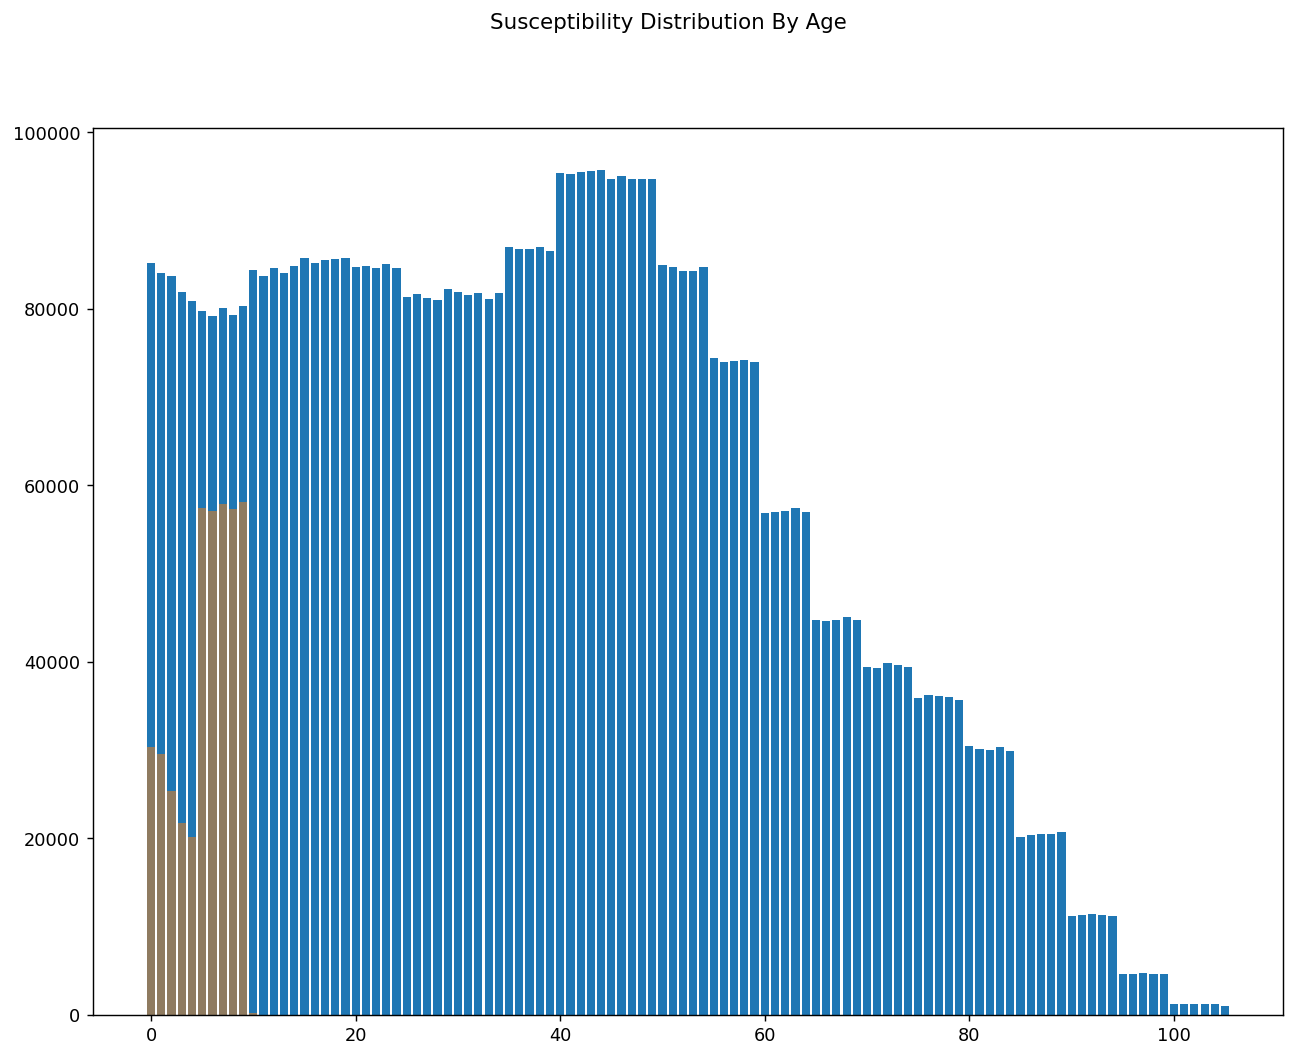

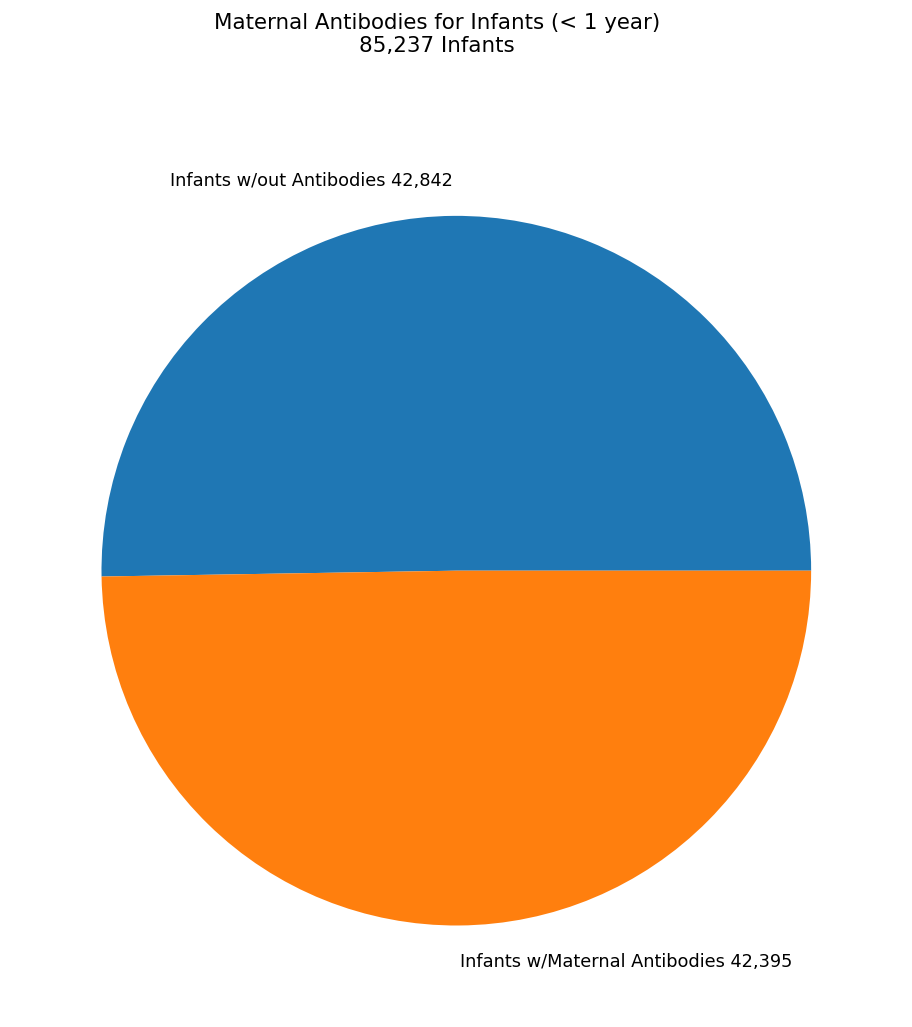

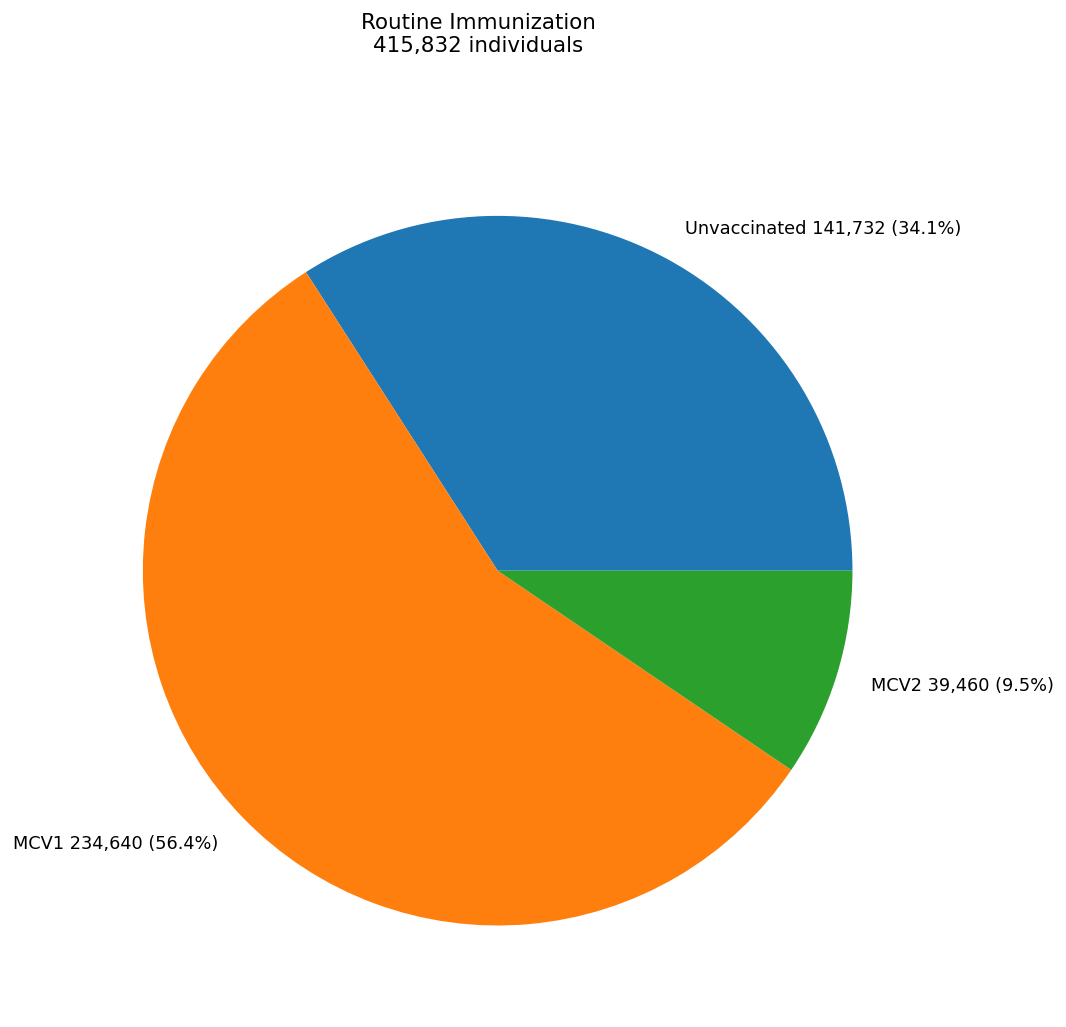

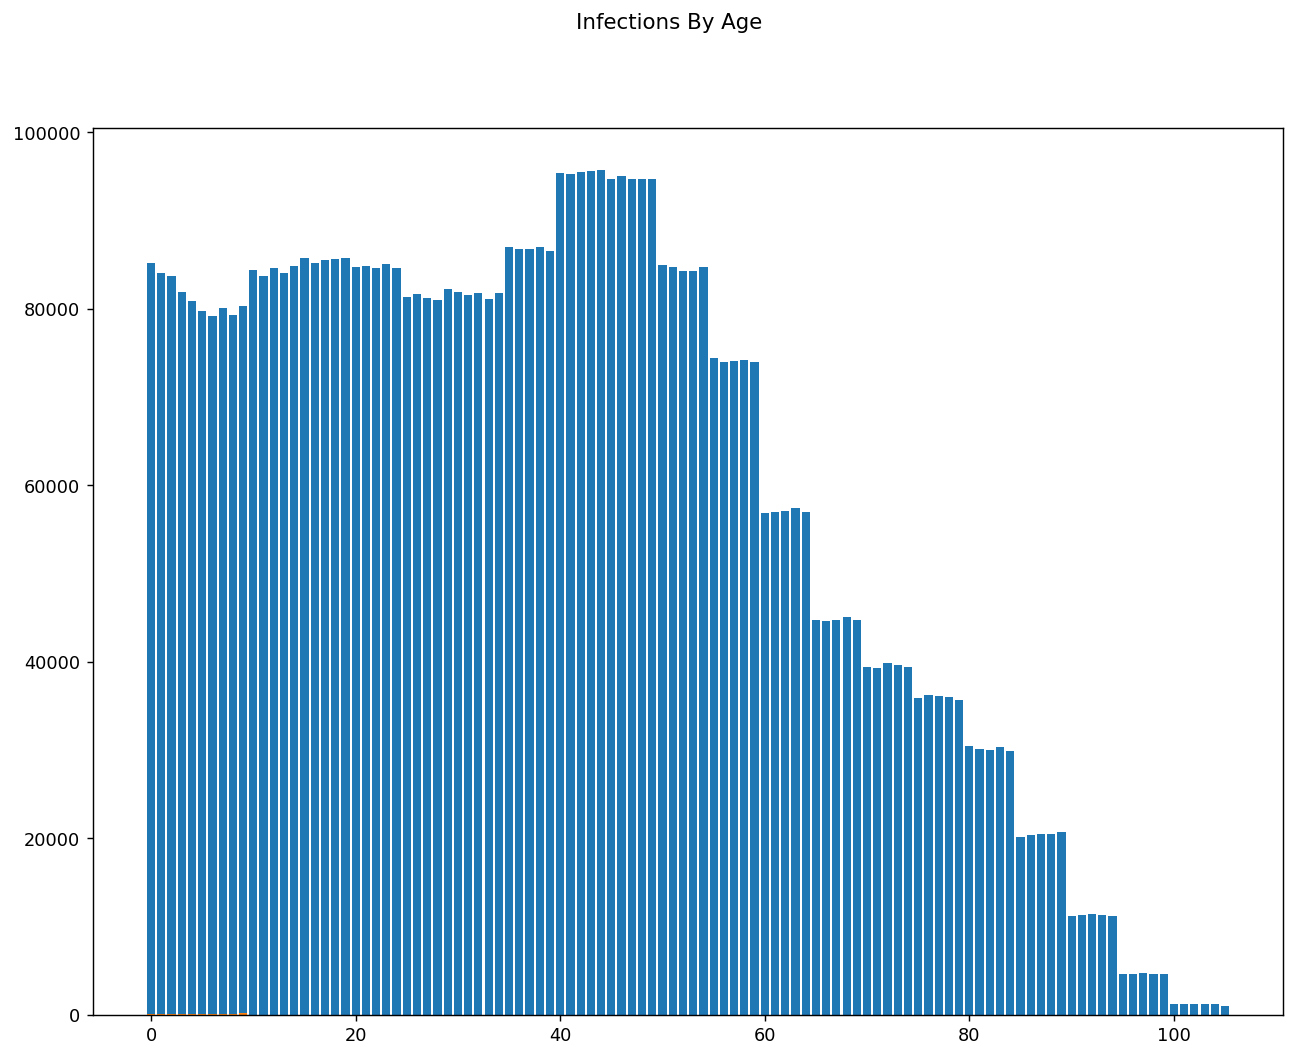

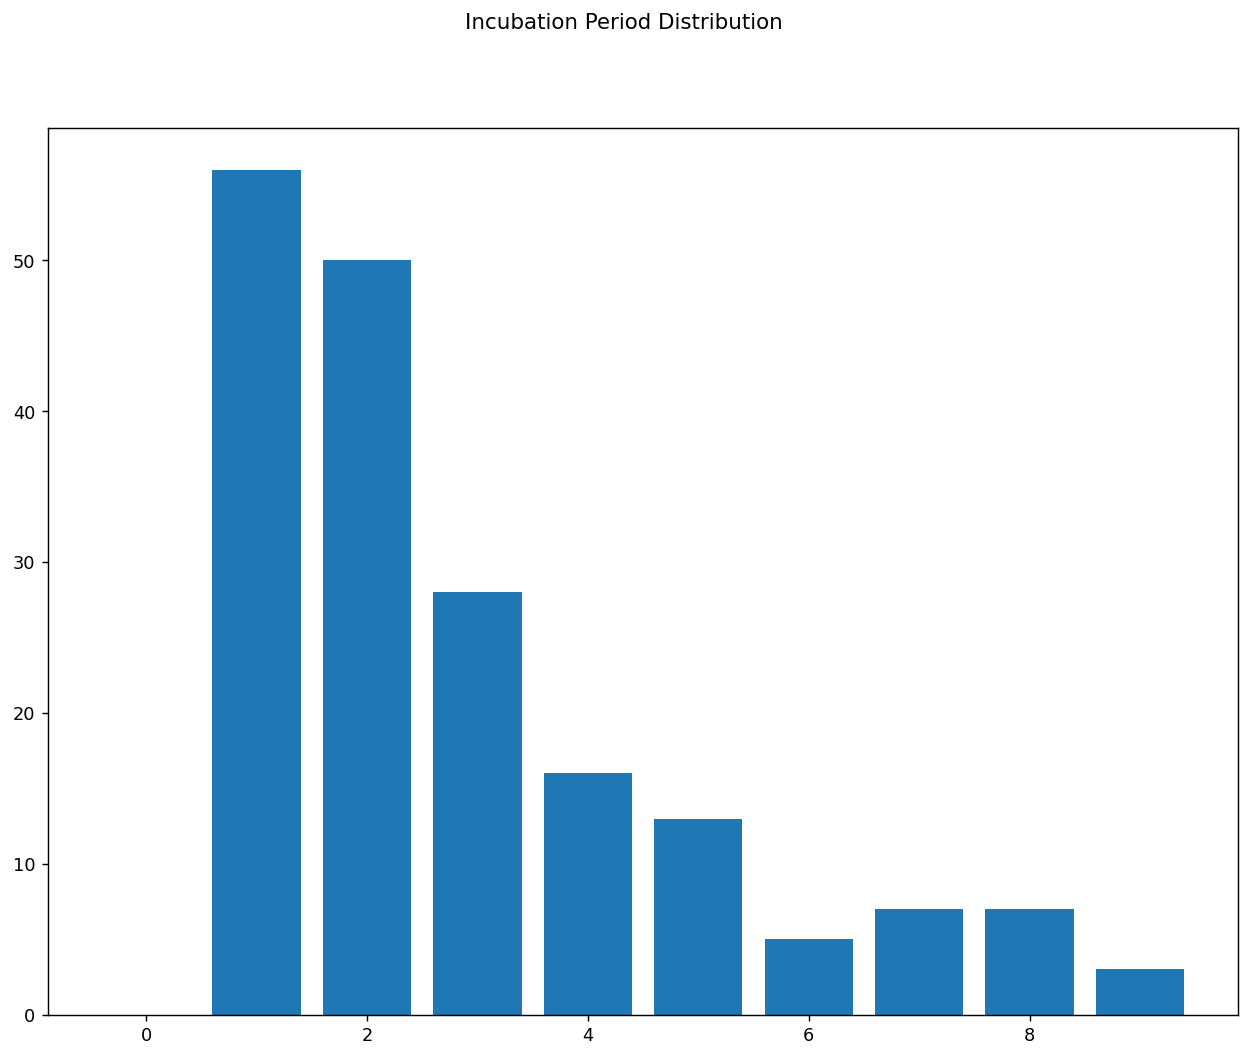

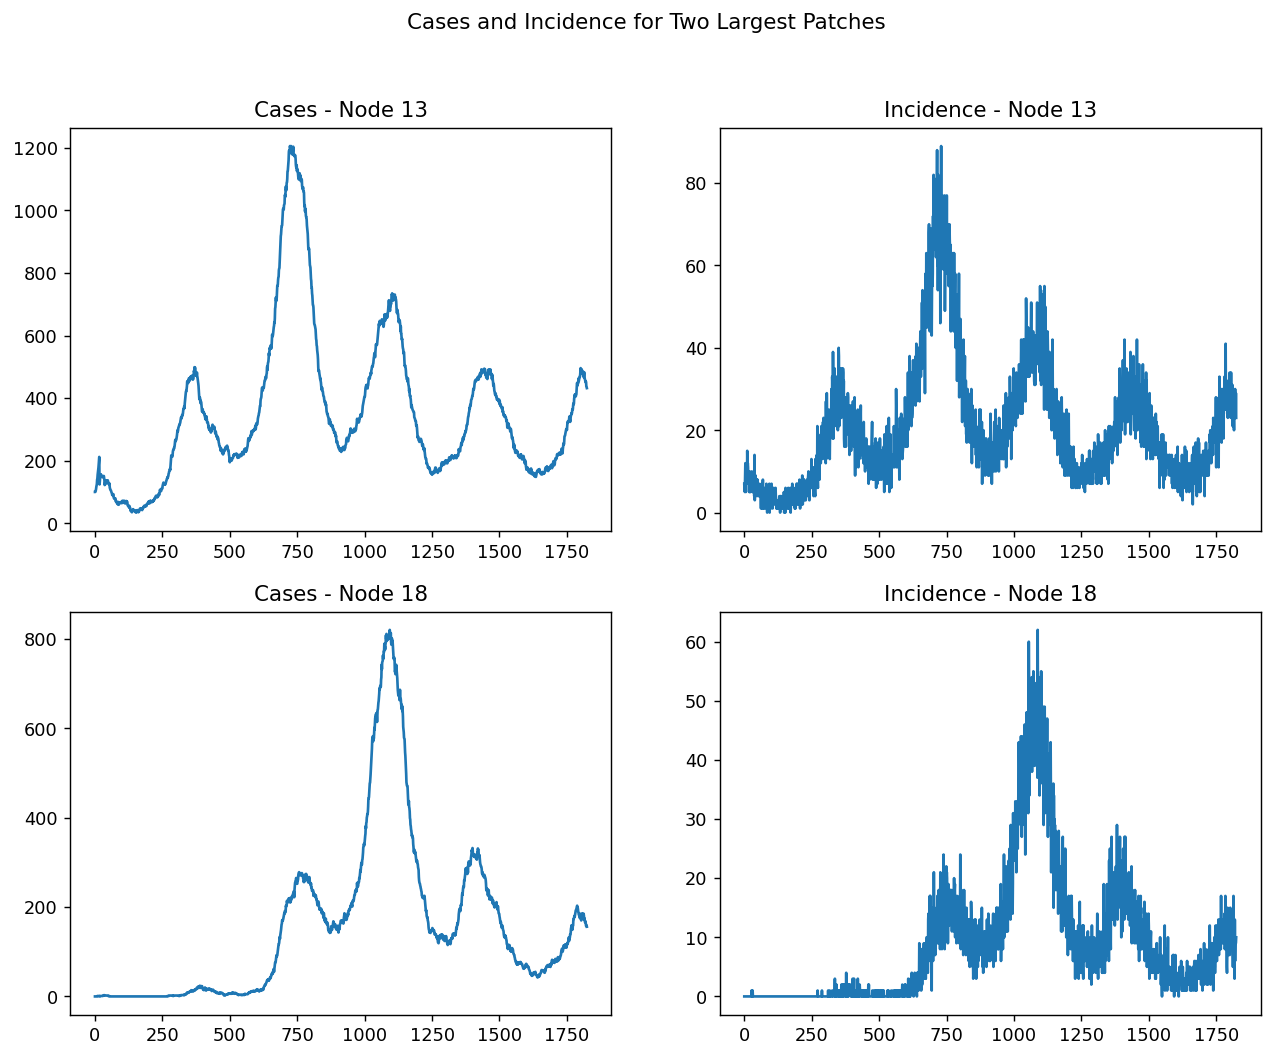

In [4]:
model.visualize(pdf=False)
